
# Fake News Detection using Deep Learning

This notebook demonstrates a deep learning approach to detecting fake news using a Bidirectional LSTM (Long Short-Term Memory) model in TensorFlow/Keras. The goal is to classify news articles as **Fake** or **Real** based on their content.

## Objective
- Build a model capable of distinguishing between fake and real news articles with high accuracy.
- Use NLP preprocessing techniques to clean and prepare the text data.
- Train a Bidirectional LSTM model for text classification.

---



## Step 1: Load Data
We have two CSV files:
- `True.csv` – Contains real news articles.
- `Fake.csv` – Contains fake news articles.

Let's load the data using pandas and explore its structure.



## Step 2: Data Preprocessing
To train an LSTM model, the text data needs to be preprocessed:

1. **Lowercasing** – Converts all text to lowercase to ensure uniformity.
2. **Removing Punctuation** – Strips out punctuation marks.
3. **Removing Stopwords** – Eliminates common words (like 'the', 'is') that do not carry meaning.
4. **Tokenization** – Converts sentences into sequences of integers using a tokenizer.
5. **Padding** – Ensures all sequences have the same length by padding shorter sequences.

---



## Step 3: Model Architecture
The model is a Bidirectional LSTM network:
- **Embedding Layer** – Converts token indices to dense vectors of fixed size.
- **Bidirectional LSTM Layer** – Captures long-term dependencies from both directions of the sequence.
- **Global Average Pooling** – Reduces dimensionality by averaging the outputs.
- **Dense Layer** – Fully connected layer with ReLU activation.
- **Output Layer** – Single neuron with sigmoid activation for binary classification.

---



## Step 4: Model Compilation and Training
- **Loss Function:** Binary Crossentropy (suitable for binary classification)
- **Optimizer:** Adam (adaptive learning rate optimizer)
- **Metric:** Accuracy

The model is trained using the training dataset for a specified number of epochs.

---



## Step 5: Model Evaluation
After training, the model is evaluated using the test set:
- **Accuracy** – Percentage of correct predictions.
- **Loss** – Binary crossentropy loss value.

---



## Step 6: Performance Metrics
### Confusion Matrix
- **True Positives (TP):** Correctly predicted real news articles.
- **True Negatives (TN):** Correctly predicted fake news articles.
- **False Positives (FP):** Incorrectly predicted fake news articles as real.
- **False Negatives (FN):** Incorrectly predicted real news articles as fake.

### Classification Report
- **Precision** – Percentage of true positive predictions out of total positive predictions.
- **Recall** – Percentage of true positive predictions out of actual positives.
- **F1-Score** – Harmonic mean of precision and recall.

---


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import re
import string


In [3]:
path_fake = "/kaggle/input/fake-news-dataset/Fake.csv"
real_path = "/kaggle/input/fake-news-dataset/True.csv"

In [5]:
fake_df = pd.read_csv(path_fake)
true_df = pd.read_csv(real_path)

In [6]:
true_df['label'] = 1
fake_df['label'] = 0

In [7]:
df = pd.concat([true_df, fake_df], ignore_index = True)
df = df[['text', 'label']]

In [8]:
df.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove links
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newlines
    return text

df['text'] = df['text'].apply(clean_text)

In [10]:
df.head()

,text,label
0,washington reuters the head of a conservative...,1
1,washington reuters transgender people will be...,1
2,washington reuters the special counsel invest...,1
3,washington reuters trump campaign adviser geo...,1
4,seattlewashington reuters president donald tr...,1


In [11]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(sequences, maxlen=500)
y = df['label'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [14]:
model = tf.keras.Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=500),
    Bidirectional(LSTM(64, return_sequences=True)),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 59s 48ms/step - accuracy: 0.8781 - loss: 0.2624 - val_accuracy: 0.9901 - val_loss: 0.0488
Epoch 2/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 54s 48ms/step - accuracy: 0.9923 - loss: 0.0314 - val_accuracy: 0.9933 - val_loss: 0.0273
Epoch 3/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 54s 48ms/step - accuracy: 0.9949 - loss: 0.0162 - val_accuracy: 0.9923 - val_loss: 0.0259
Epoch 4/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 54s 48ms/step - accuracy: 0.9979 - loss: 0.0091 - val_accuracy: 0.9955 - val_loss: 0.0171
Epoch 5/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 54s 48ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9969 - val_loss: 0.0153


In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9967 - loss: 0.0195
Test accuracy: 1.00


In [17]:
model.save('fake_news_detector.h5')

## Model testing

In [21]:
def predict_news(text):
    cleaned_text = clean_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=500)
    prediction = model.predict(padded_sequence)[0][0]
    return "Real" if prediction > 0.5 else "Fake"

# example
news = "March 27 (Reuters) - ​The U.S. Space Force's Space Systems Command said on Thursday it had awarded contracts to Rocket Lab USA (RKLB.O), opens new tab and Stoke Space to expand its portfolio of launch systems for critical space capability. Shares of Rocket Lab USA rose 9.7% in extended trading after the announcement. The contract enables the company to compete for future U.S. national security launch missions."
result = predict_news(news)
print(f"Prediction: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction: Real


## Analyzing misclassified examples

In [22]:
predictions = model.predict(X_test).flatten()
predicted_labels = (predictions > 0.5).astype(int)
misclassified = X_test[predicted_labels !=y_test]

281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


## Visualizing the model performance

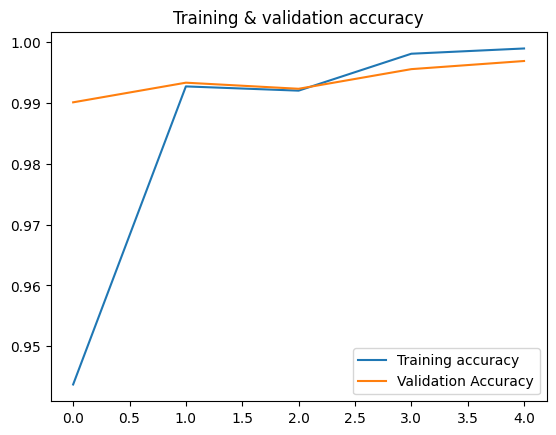

In [24]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & validation accuracy')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Fake", "Real"])
print("\nClassification Report:\n", report)


281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step

Classification Report:
               precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4650
        Real       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



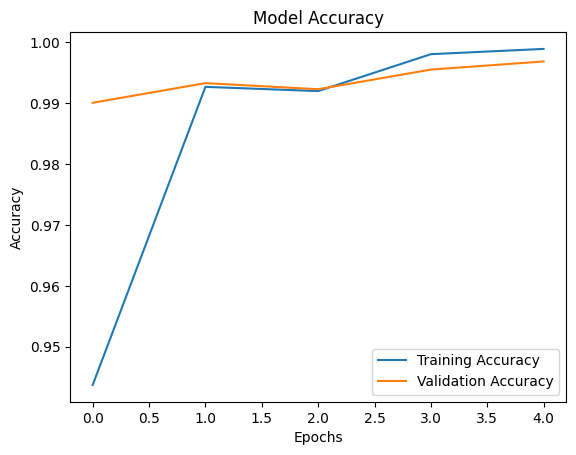

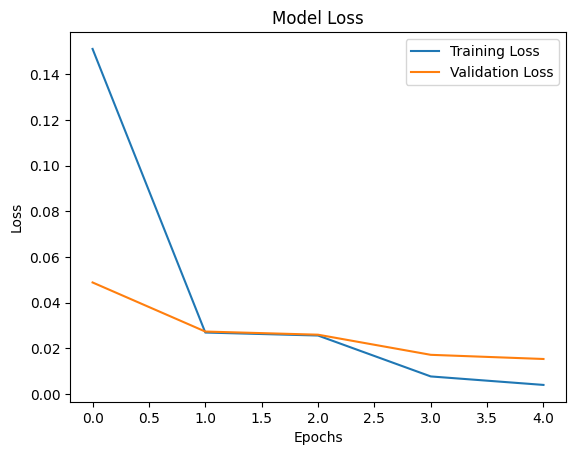

In [31]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


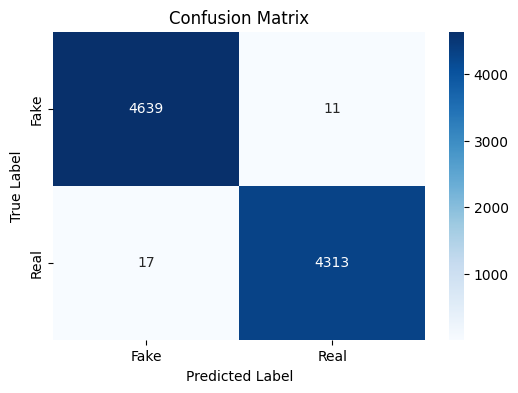

In [32]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
